# Home Task 3

In [1]:
!pip install matplotlib python-sat

import re
from itertools import chain
from pysat.solvers import Solver
from matplotlib import patches
from matplotlib import pyplot as plt

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 884 kB/s eta 0:00:01
distutils: /home/dmitry/.local/include/python3.8/UNKNOWN
sysconfig: /home/dmitry/.local/include/python3.8
user = True
home = None
root = None
prefix = None


# Data

In [2]:
bricks = """45,15	20,10	0,0 20,0 0,10 20,10
50,15	20,10	0,0 20,0 0,10 20,10
25,30	20,10	0,0 20,0 0,10 20,10
30,20	20,10	0,0 20,0 0,10 20,10
55,20	20,10	0,0 20,0 0,10 20,10
40,35	20,10	0,0 20,0 0,10 20,10
"""

In [3]:
frame = """25,20	10,10	0,0 10,0 0,10 10,10
25,40	10,30	0,0 10,0 0,15 10,15 0,30 10,30
25,60	10,10	0,0 10,0 0,10 10,10
40,25	20,10	0,0 10,0 20,0 0,10 10,10 20,10
40,40	20,20	0,0 10,0 20,0 0,10 10,10 20,10 0,20 10,20 20,20
40,55	20,10	0,0 10,0 20,0 0,10 10,10 20,10
55,35	10,20	0,0 10,0 0,10 10,10 0,20 10,20
55,40	10,20	0,0 10,0 0,10 10,10 0,20 10,20"""

In [4]:

hard1 = """111,152	33,47	0,0 33,0 0,47 33,47
55,142	35,25	0,0 35,0 0,25 35,25
73,62	40,21	0,0 40,0 0,7 40,7 0,14 40,14 0,21 40,21
54,193	10,48	0,0 10,0 0,48 10,48
191,7	18,47	0,0 6,0 12,0 18,0 0,47 6,47 12,47 18,47
187,135	29,23	0,0 29,0 0,23 29,23
174,50	45,22	0,0 15,0 30,0 45,0 0,22 15,22 30,22 45,22
33,31	34,29	0,0 34,0 0,29 34,29
193,174	14,14	0,0 14,0 0,14 14,14
155,140	25,20	0,0 25,0 0,20 25,20
136,92	20,31	0,0 20,0 0,31 20,31
71,187	25,29	0,0 25,0 0,29 25,29
104,38	53,11	0,0 53,0 0,11 53,11
83,41	14,24	0,0 14,0 0,24 14,24
29,158	16,41	0,0 16,0 0,41 16,41
7,107	31,21	0,0 31,0 0,21 31,21
128,5	15,10	0,0 15,0 0,10 15,10
53,111	12,20	0,0 12,0 0,20 12,20
22,5	24,10	0,0 12,0 24,0 0,10 12,10 24,10
167,5	11,42	0,0 11,0 0,42 11,42
114,125	10,23	0,0 10,0 0,23 10,23
143,145	11,45	0,0 11,0 0,45 11,45
57,100	37,18	0,0 37,0 0,18 37,18
176,99	12,32	0,0 12,0 0,32 12,32
28,130	18,12	0,0 18,0 0,12 18,12"""

In [5]:
hard2 = """134,105	33,19	0,0 33,0 0,19 33,19
171,60	13,42	0,0 13,0 0,42 13,42
118,70	55,44	0,0 55,0 0,44 55,44
26,113	32,42	0,0 32,0 0,21 32,21 0,42 32,42
161,44	20,12	0,0 10,0 20,0 0,4 10,4 20,4 0,8 10,8 20,8 0,12 10,12 20,12
42,49	16,39	0,0 16,0 0,13 16,13 0,26 16,26 0,39 16,39
81,184	51,23	0,0 51,0 0,23 51,23
180,168	46,11	0,0 23,0 46,0 0,11 23,11 46,11
164,199	17,18	0,0 17,0 0,18 17,18
163,39	27,29	0,0 27,0 0,29 27,29
58,11	29,28	0,0 29,0 0,28 29,28
106,190	36,49	0,0 36,0 0,49 36,49
197,118	18,28	0,0 18,0 0,28 18,28
92,115	20,27	0,0 20,0 0,27 20,27
134,100	14,10	0,0 14,0 0,10 14,10
54,186	38,12	0,0 38,0 0,12 38,12
201,41	10,46	0,0 10,0 0,23 10,23 0,46 10,46
12,92	22,23	0,0 22,0 0,23 22,23
88,155	12,27	0,0 4,0 8,0 12,0 0,27 4,27 8,27 12,27
175,158	27,25	0,0 27,0 0,25 27,25
199,133	20,32	0,0 20,0 0,32 20,32
91,186	23,13	0,0 23,0 0,13 23,13
135,75	21,28	0,0 21,0 0,28 21,28"""

In [6]:
hard3 = """65,144	19,46	0,0 19,0 0,46 19,46
64,104	16,14	0,0 16,0 0,14 16,14
78,8	48,29	0,0 16,0 32,0 48,0 0,29 16,29 32,29 48,29
125,167	15,10	0,0 15,0 0,10 15,10
198,27	39,15	0,0 39,0 0,5 39,5 0,10 39,10 0,15 39,15
91,136	56,32	0,0 56,0 0,16 56,16 0,32 56,32
40,72	26,26	0,0 26,0 0,26 26,26
198,75	11,34	0,0 11,0 0,34 11,34
132,193	46,10	0,0 46,0 0,10 46,10
66,187	26,30	0,0 26,0 0,30 26,30
60,122	33,10	0,0 11,0 22,0 33,0 0,10 11,10 22,10 33,10
178,92	31,28	0,0 31,0 0,28 31,28
94,171	10,17	0,0 5,0 10,0 0,17 5,17 10,17
148,145	14,39	0,0 14,0 0,39 14,39
58,59	23,22	0,0 23,0 0,22 23,22
15,29	12,38	0,0 4,0 8,0 12,0 0,38 4,38 8,38 12,38
131,26	12,31	0,0 12,0 0,31 12,31
171,184	19,18	0,0 19,0 0,9 19,9 0,18 19,18
111,57	21,11	0,0 21,0 0,11 21,11
47,10	18,19	0,0 9,0 18,0 0,19 9,19 18,19
168,61	12,21	0,0 12,0 0,21 12,21
90,106	24,20	0,0 24,0 0,20 24,20
26,127	22,44	0,0 11,0 22,0 0,44 11,44 22,44
125,59	14,19	0,0 7,0 14,0 0,19 7,19 14,19
127,98	48,17	0,0 16,0 32,0 48,0 0,17 16,17 32,17 48,17
195,155	23,28	0,0 23,0 0,28 23,28
99,91	20,26	0,0 20,0 0,26 20,26
64,202	35,11	0,0 35,0 0,11 35,11"""

In [7]:
hard4 = """58,167	41,14	0,0 41,0 0,14 41,14
20,126	15,38	0,0 15,0 0,38 15,38
120,101	48,12	0,0 16,0 32,0 48,0 0,4 16,4 32,4 48,4 0,8 16,8 32,8 48,8 0,12 16,12 32,12 48,12
155,51	14,19	0,0 14,0 0,19 14,19
184,111	19,14	0,0 19,0 0,14 19,14
153,170	50,33	0,0 25,0 50,0 0,33 25,33 50,33
38,114	29,29	0,0 29,0 0,29 29,29
37,21	17,48	0,0 17,0 0,24 17,24 0,48 17,48
64,109	45,17	0,0 45,0 0,17 45,17
99,182	28,26	0,0 28,0 0,26 28,26
164,71	36,34	0,0 18,0 36,0 0,17 18,17 36,17 0,34 18,34 36,34
76,38	24,19	0,0 8,0 16,0 24,0 0,19 8,19 16,19 24,19
88,20	23,46	0,0 23,0 0,46 23,46
132,67	23,28	0,0 23,0 0,28 23,28
190,151	13,48	0,0 13,0 0,16 13,16 0,32 13,32 0,48 13,48
101,169	39,25	0,0 39,0 0,25 39,25
189,33	15,14	0,0 3,0 6,0 9,0 12,0 15,0 0,14 3,14 6,14 9,14 12,14 15,14
51,191	32,15	0,0 32,0 0,5 32,5 0,10 32,10 0,15 32,15
189,166	31,18	0,0 31,0 0,18 31,18
147,128	21,11	0,0 7,0 14,0 21,0 0,11 7,11 14,11 21,11
142,81	15,14	0,0 3,0 6,0 9,0 12,0 15,0 0,7 3,7 6,7 9,7 12,7 15,7 0,14 3,14 6,14 9,14 12,14 15,14
44,75	11,12	0,0 11,0 0,12 11,12
72,88	21,47	0,0 21,0 0,47 21,47
76,65	12,11	0,0 12,0 0,11 12,11
108,83	13,15	0,0 13,0 0,5 13,5 0,10 13,10 0,15 13,15
53,59	13,33	0,0 13,0 0,33 13,33
88,185	12,11	0,0 12,0 0,11 12,11
121,28	12,10	0,0 12,0 0,5 12,5 0,10 12,10
144,21	30,13	0,0 15,0 30,0 0,13 15,13 30,13"""

In [8]:
hard5 = """97,148	59,25	0,0 59,0 0,25 59,25
49,75	36,46	0,0 36,0 0,46 36,46
61,15	24,20	0,0 24,0 0,10 24,10 0,20 24,20
141,166	10,31	0,0 5,0 10,0 0,31 5,31 10,31
137,34	42,42	0,0 42,0 0,21 42,21 0,42 42,42
121,92	36,21	0,0 36,0 0,21 36,21
172,117	21,19	0,0 21,0 0,19 21,19
137,122	54,30	0,0 54,0 0,15 54,15 0,30 54,30
99,161	19,22	0,0 19,0 0,22 19,22
87,20	24,25	0,0 8,0 16,0 24,0 0,25 8,25 16,25 24,25
134,161	49,18	0,0 49,0 0,18 49,18
84,187	38,13	0,0 19,0 38,0 0,13 19,13 38,13
76,141	57,18	0,0 57,0 0,18 57,18
111,15	15,45	0,0 5,0 10,0 15,0 0,45 5,45 10,45 15,45
189,162	30,19	0,0 10,0 20,0 30,0 0,19 10,19 20,19 30,19
181,6	28,26	0,0 14,0 28,0 0,26 14,26 28,26
20,147	24,17	0,0 8,0 16,0 24,0 0,17 8,17 16,17 24,17
57,53	31,15	0,0 31,0 0,15 31,15
203,138	15,20	0,0 15,0 0,20 15,20
39,179	14,25	0,0 14,0 0,25 14,25
185,65	16,42	0,0 16,0 0,42 16,42
71,97	12,47	0,0 12,0 0,47 12,47"""

# Implementation

Reading data

In [69]:
def parse(data):
  points = []
  uid = 1
  for line in data.strip().split('\n'):
    coords, rect_sizes, offsets = re.split(r"\s+", line, maxsplit=2)
    x, y = parseCoord(coords)
    point = {(x, y): []}
    width, height = parseCoord(rect_sizes)
    
    for offset_x, offset_y in (parseCoord(offset) for offset in offsets.split(" ")):
      rect_x = x - offset_x
      rect_y = y - offset_y
      if rect_x < 0 or rect_y < 0:
        continue
      if (rect_x + width) > 500 or (rect_y + height) > 500:
        continue
      rect = (rect_x, rect_y, width, height, uid)
      point[(x, y)].append(rect)
      uid = uid + 1
    points.append(point)
  return points

In [70]:
def parseCoord(two_dimensions):
  x, y = tuple(map(int, two_dimensions.split(",")))
  return (x, y)

Drawing

In [71]:
def is_intersect(rect1, rect2):
        if (rect1[0] < rect2[0]):
           left_rect, right_rect = (rect1, rect2)
        else:
           left_rect, right_rect = (rect2, rect1)
        if (rect1[1] < rect2[1]):
            up_rect, down_rect = (rect1, rect2)
        else:
            up_rect, down_rect = (rect2, rect1)

        if (left_rect[0] <= right_rect[0] <= left_rect[0] + left_rect[2] and up_rect[1] <= down_rect[1] <= up_rect[1] + up_rect[3]):
            return True
        return False

In [72]:
def get_conflicts(rects):
  conflicts = {}
  for rect1 in rects:
    for rect2 in rects:
      if rect1[4] == rect2[4]:
        continue

      if is_intersect(rect1, rect2):
        if rect1[4] not in conflicts:
          conflicts[rect1[4]] = set()
        conflicts[rect1[4]].add(rect2[4])
  return conflicts

In [73]:
def rectLayer(points):
  rects = flatten([list(point.values()) for point in points])
  rectsDict = {rect[4]: rect for rect in rects}
  conflicts = get_conflicts(rects)
  with Solver(name="mc") as solver:
    for point in points:
      rects_uids = [rect[4] for rect in next(iter(point.values()))]
      solver.add_atmost(rects_uids, 1)
      solver.add_clause(rects_uids)
    for rect in rects:
      if rect[4] in conflicts:
        for confId in conflicts[rect[4]]:
          solver.add_clause([-rect[4], -confId])
    if solver.solve():
      ids = solver.get_model()
      return [rectsDict[idx] for idx in ids if idx > 0]
    else:
      print("Can't find the solution!!!")
      raise

In [74]:
def flatten(multi_dimension_list, times = 2):
  flatten_list = multi_dimension_list
  for i in range(times):
    flatten_list = list(chain.from_iterable(flatten_list))
  return flatten_list

In [75]:
def draw_labels(rects, points, label):
    fig, ax = plt.subplots(figsize=(14, 9))
    scatter_x = [p[0] for p in points]
    scatter_y = [p[1] for p in points]
    ax.set_title(label)
    ax.scatter(scatter_x, scatter_y, color='black')
    patch_rects = [patches.Rectangle(xy=(rect[0], rect[1]), width=rect[2], height=rect[3], alpha=0.7) for i, rect in enumerate(rects)]
    for patch_rect in patch_rects:
        ax.add_patch(patch_rect)
    plt.show()

# Examples

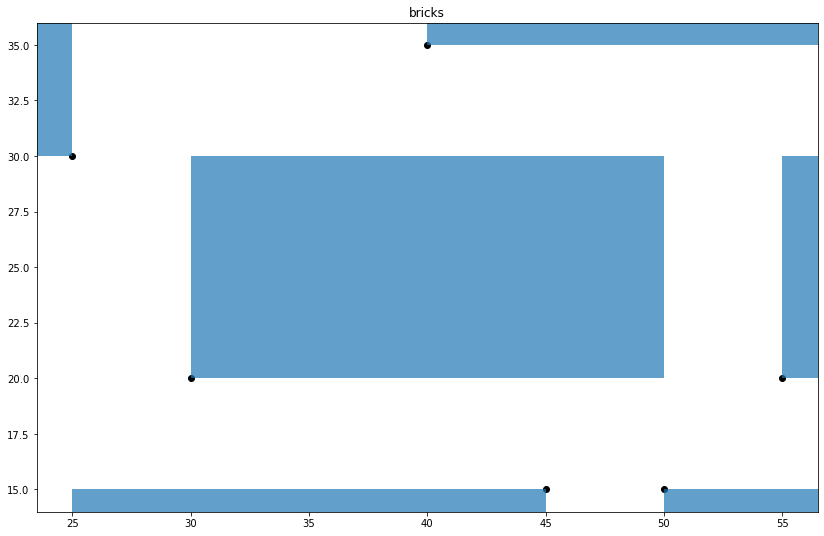

In [80]:
points = parse(bricks)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "bricks")

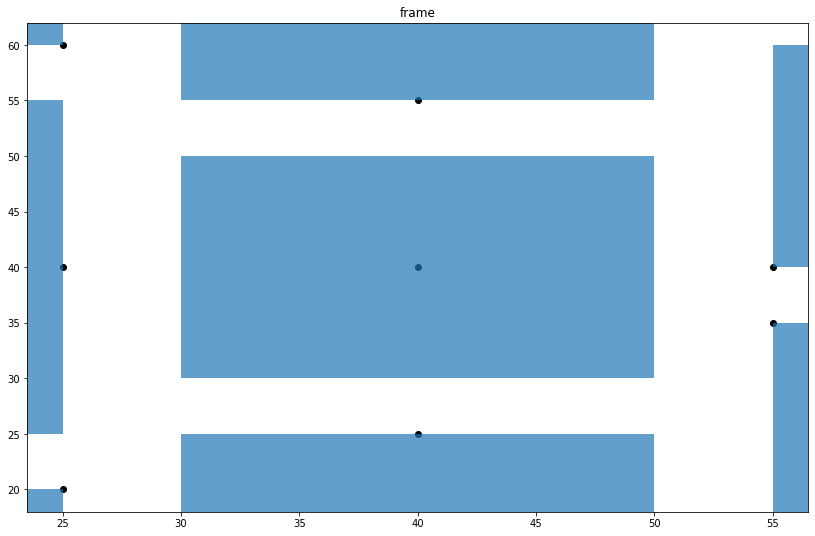

In [81]:
points = parse(frame)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "frame")

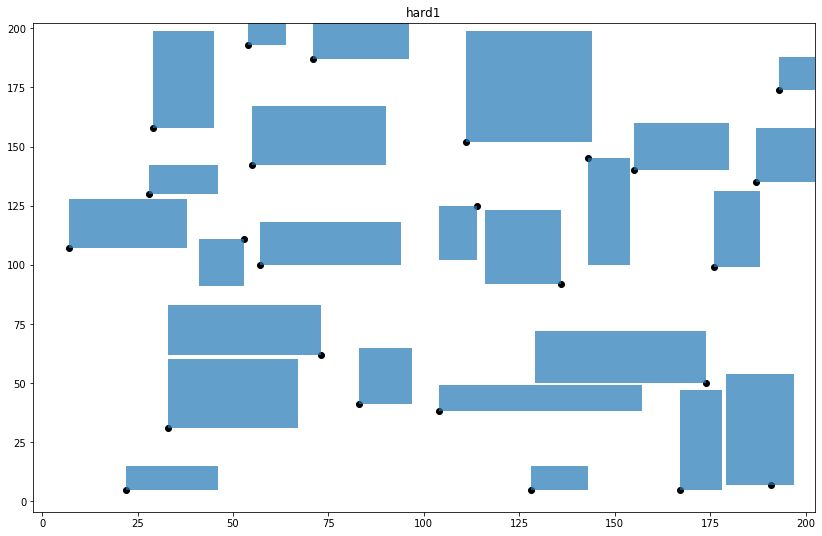

In [82]:
points = parse(hard1)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "hard1")

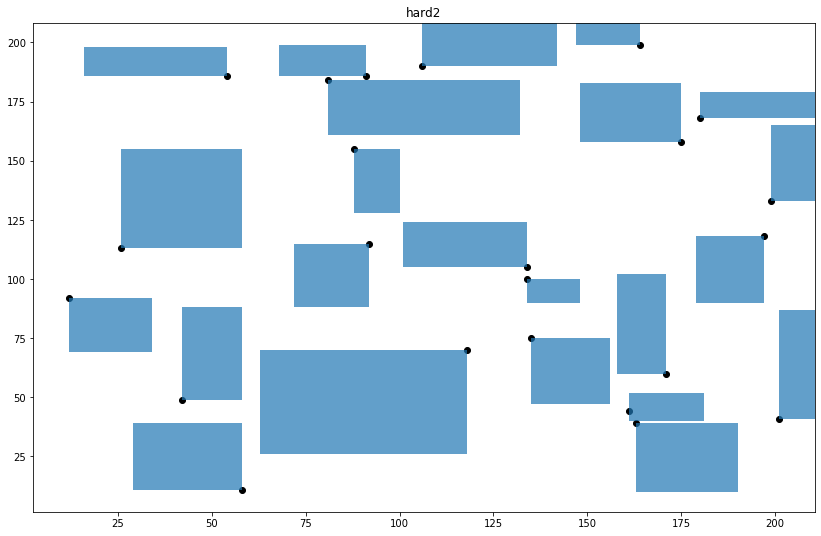

In [83]:
points = parse(hard2)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "hard2")

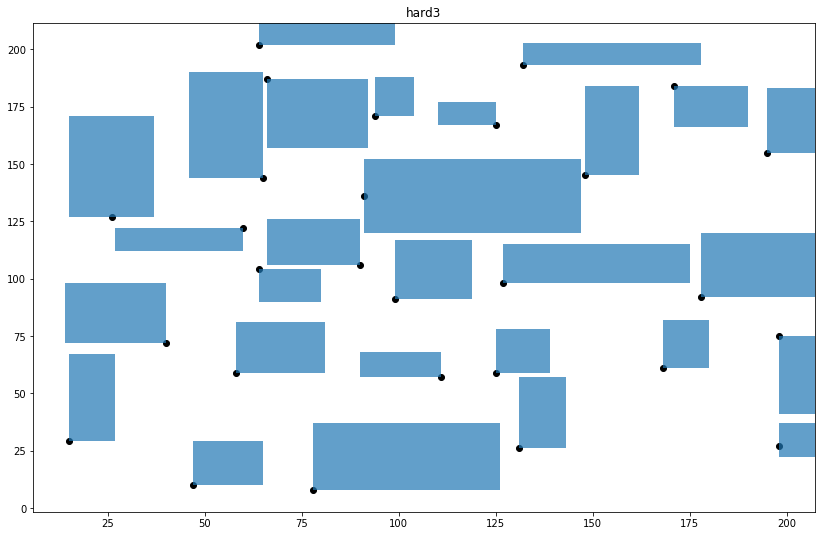

In [84]:
points = parse(hard3)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "hard3")

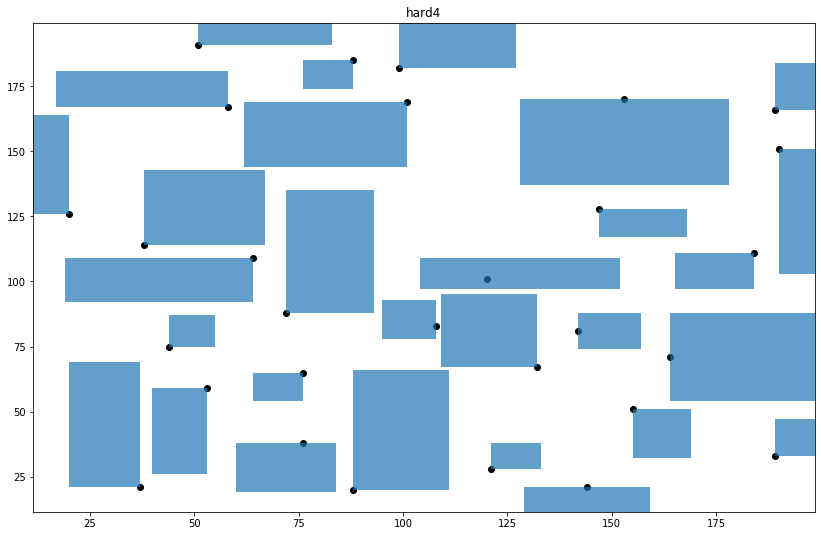

In [85]:
points = parse(hard4)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "hard4")

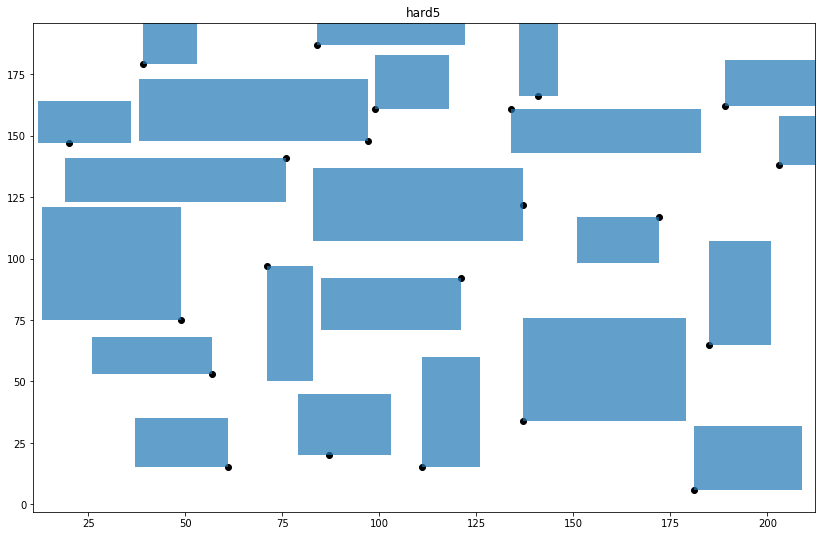

In [86]:
points = parse(hard5)
result_rects = rectLayer(points)
draw_labels(result_rects, [next(iter(point.keys())) for point in points], "hard5")